# **Customer Lifetime Value**

[Customer Lifetime Value Data](https://www.kaggle.com/code/juancarlosventosa/models-to-improve-customer-retention/notebook)





### **Context**
Getting a new customer is much more expensive than keeping an existing one, with prices ranging from five to twenty-five times greater. The idea is straightforward: rather than investing resources in acquiring new consumers, you can concentrate on keeping your current customers delighted. According to research by Frederick Reichheld of Bain & Company, the developer of the net promoter score, a modest 5% increase in customer retention rates can lead to a large profit jump of 25% to 95%.

The customer churn rate is an important indicator for understanding whether your firm is successfully keeping clients. client Lifetime Value (CLV) is another important indicator that demonstrates the importance of client retention.

CLV is the total amount of money spent by a customer with your organization over the course of their business relationship. It is used to anticipate the overall revenue value produced from each customer. Businesses can improve profitability, distribute funds more effectively, and obtain vital insights into customer happiness by understanding and optimizing CLV. CLV is especially important for businesses that rely on repeat purchases or subscription-based business models, such as food and home goods manufacturers, as well as insurance and telecommunications providers.

**Problem Statement**

In this project, a vehicle insurance firm in the United States faces revenue issues. An unsuccessful marketing approach, in which the company devotes the same budget to all categories of clients, results in overspending on low-value customers and losing high-value customers. To address this issue, the company has decided to use the Customer Lifetime Value (CLV) metric to assess the worth of its customers and build marketing tactics based on their CLV. However, due to human data processing, the company lacks a fast and accurate CLV prediction system, which impedes timely marketing decision-making. As a result, having a faster and more accurate CLV prediction is critical for implementing more precise marketing strategies.

**Goals**

To tackle the aforementioned issues, the automotive insurance company would profit immensely from a program that predicts CLV based on consumer demographic data and vehicle insurance facts. This tool would reduce manual data processing, allowing for speedier marketing strategy decision-making. The organization can acquire significant insights into client value by utilizing such a technology and tailoring marketing activities accordingly. It would make it easier to identify high-value clients, enabling tailored attention and targeted promotional activities. Furthermore, it would aid in resource optimization by preventing wasteful spending on low-value consumers. Finally, an automated CLV prediction tool would enable the organization to make data-driven decisions, increasing marketing efficiency and profit.


**Analytic Approach**

To remedy the situation, we will analyze data to uncover trends within existing features, with the goal of differentiating the CLV of each customer. Following that, we will create a regression model that will be a useful tool for forecasting CLV. This model will allow the organization to forecast CLV more accurately. The organization may optimize marketing tactics and budget allocation by employing this regression model, while also delivering reliable advice to improve customer connections.


**Metric Evaluation**

We will assess performance using measures such as RMSE, MAE, and MAPE. RMSE is for root mean square error, MAE stands for mean absolute error, and MAPE stands for mean absolute percentage error in the regression model. Given the limits of the selected features, lower values of RMSE, MAE, and MAPE suggest a higher level of accuracy in forecasting CLV. These measures will assist us in evaluating the model's accuracy and capacity to predict CLV effectively.


---

## **Data Understanding**

- The dataset is car insurance customer data in the United States in 2019

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Vehicle type classification |
| Coverage | Object | Types of vehicle insurance coverage |
| Renew Type Offer | Object | Offer to renew policies that have been/will expire |
| EmploymentStatus | Object | Customer's employment status |
| Marital Status | Object | Customer's marital status |
| Education | Object | Customer's educational level |
| Number of Policies | Float | Number of policies owned by the customer |
| Monthly Premium Auto | Float | Monthly premium paid by the insured |
| Total Claim Amount | Float | Cumulative number of claims since the beginning of the policy |
| Income | Float | Customer's income (in dollar) |
| Customer Lifetime Value | Float | Customer Lifetime Value (Target) |



## **Import Libraries**

In [85]:
# Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **Load Dataset** 
**Data Cleaning**

In [86]:
# Showing Customer Lifetime Value dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [87]:
# dataset type info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [88]:
# checking missing values
df.isna().sum()

# no missing values

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [89]:
# checking duplicates
print('there are', df.duplicated().sum(), 'duplicate(s) in the data')


there are 618 duplicate(s) in the data


**It is known that there are 618 duplicate customer records in this collection. Duplicate data is defined as customer data that has the same value as customer data in other rows. Duplicate data must be removed so that the algorithm learns solely from specific data while modeling. If duplicate data is permitted, the model program will investigate the duplicate data excessively, resulting in poor data predictions (bias). As a result, the next 618 duplicate records will be removed.**


In [90]:
# drop duplicates
df = df.drop_duplicates()

# show rows & columns after drop duplicates
print(f'Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}')

Number of Rows: 5051
Number of Columns: 11


In [91]:
# showing descriptive statistics from numerical & categorical variable
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


In [92]:
# showing unique data in each columns
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

/var/folders/0d/6skb2h1x7zsg4qzhw1p14jdc0000gp/T/ipykernel_1257/1539715786.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


### Outlier Detection

Outliers are data points whose values diverge significantly from the average. The amount of outliers can also have an impact on the findings of the research and modeling. Outlier treatment cannot automatically remove outliers from a dataset since it has the ability to discard a large amount of data; consequently, outlier treatment must also take domain knowledge into account. However, by ignoring outliers, modeling will be limited to predicting CLV using only clean data sets. The model's forecast results will be erroneous outside of the data range.


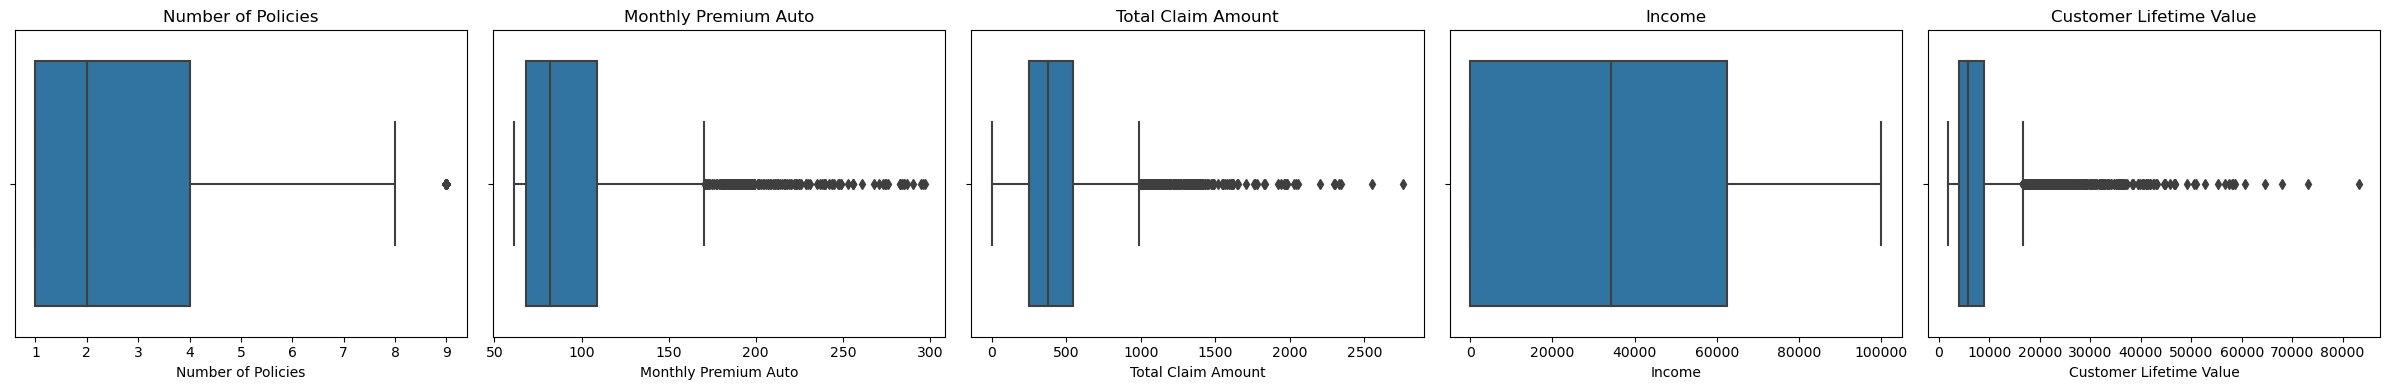

In [93]:
# boxplot for detect outlier
plt.figure(figsize=(24,4))
num_subplot = 1

for i in df.describe().columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=df, x=i),
    plt.title(i),
    plt.tight_layout()
    num_subplot+=1

Outliers can be seen in numerous aspects, including `Number of Policies,` `Monthly Premium Auto,` `Total Claim Amount,` and `Customer Lifetime Value,` as seen in the boxplot above. In this project, I will address the outliers mentioned above by taking the IQR value and domain knowledge into account in order to build a cleaner dataset and improve model performance and prediction of CLV values.

In [94]:
# create function IQR detection
def iqr_detection(data):
    q1 = df[data].quantile(0.25)
    q3 = df[data].quantile(0.75)
    iqr = q3 - q1
    bound = iqr*1.5
    print(f'IQR of {data}: {iqr}')

    upper = q3 + bound
    lower = q1 - bound
    print(f'Upperbound: {upper}')
    print(f'Lowerbound: {lower}')

#### Feature: Number of Policies

In [95]:
# IQR from 'Number of Policies'
iqr_detection('Number of Policies')

IQR of Number of Policies: 3.0
Upperbound: 8.5
Lowerbound: -3.5


In [96]:
# descriptive statistic form 'Number of Policies'
df['Number of Policies'].describe()

count    5051.000000
mean     2.992081   
std      2.386500   
min      1.000000   
25%      1.000000   
50%      2.000000   
75%      4.000000   
max      9.000000   
Name: Number of Policies, dtype: float64

In [97]:
# View the unique value of the 'Number of Policies' and the amount of data above the upperbound
print('Number of unique values ​​in \'Number of Policies\':', df['Number of Policies'].unique())
print('Total data above upperbound value \'Number of Policies\':', len(df[df['Number of Policies'] > 8.5]))

Number of unique values ​​in 'Number of Policies': [2. 6. 1. 8. 5. 3. 7. 4. 9.]
Total data above upperbound value 'Number of Policies': 228


The highest bound value for the `Number of Policies` feature is 8.5. After evaluating the data, it is discovered that only the value 9 in the `Number of Policies` field exceeds the upper bound, with a total of 228 clients having this value. Although customers with 9 policies are considered outliers based on the boxplot, I have decided not to eliminate these outliers to ensure predictions may be made for customers with up to 9 insurance. This judgment is confirmed by the heatmap's high positive connection between CLV and `Number of Policies.` As a result, I'm curious whether the `Number of Policies` option will have a substantial impact on the model or not.


#### Feature: Monthly Premium Auto

In [98]:
# IQR from 'Monthly Premium Auto'
iqr_detection('Monthly Premium Auto')

IQR of Monthly Premium Auto: 41.0
Upperbound: 170.5
Lowerbound: 6.5


In [99]:
# descriptive statistics from 'Monthly Premium Auto'
df['Monthly Premium Auto'].describe()

count    5051.000000
mean     92.911107  
std      34.335010  
min      61.000000  
25%      68.000000  
50%      82.000000  
75%      109.000000 
max      297.000000 
Name: Monthly Premium Auto, dtype: float64

In [100]:
print('Total data above upperbound value \'Monthly Premium Auto\':', len(df[df['Monthly Premium Auto'] > 170.5]))

Total data above upperbound value 'Monthly Premium Auto': 252


The `Monthly Premium Auto` feature's upper bound value is $170.5, and there are 252 data points that exceed this barrier. Dropping these outliers solely on the basis of the upper bound would result in a significant loss of data for modeling purposes.

Given the regional disparities in auto insurance pricing in the United States, where rates are decided by state and zip code, the highest limit for `Monthly Premium Auto` is considered to be $224.42, reflecting the highest average premium in Michigan. It should be noted, however, that this method presents a limitation to the model, as projections for `Monthly Premium Auto` numbers more than $224.42 may be less accurate.


#### Feature: Total Claim Amount

In [101]:
# IQR from 'Total Claim Amount'
iqr_detection('Total Claim Amount')

IQR of Total Claim Amount: 296.34681750000004
Upperbound: 992.6433477500001
Lowerbound: -192.74392225000005


In [102]:
# descriptive statistics from 'Total Claim Amount'
df['Total Claim Amount'].describe()

count    5051.000000
mean     429.798954 
std      293.129102 
min      0.423310   
25%      251.776304 
50%      374.400000 
75%      548.123122 
max      2759.794354
Name: Total Claim Amount, dtype: float64

In [103]:
print('Total data above upperbound value \'Total Claim Amount\':', len(df[df['Total Claim Amount'] > 992.64]))

Total data above upperbound value 'Total Claim Amount': 217


The `Total Claim Amount` feature's upper bound value is $992.64, with 217 data points above this threshold. Dropping outliers simply on the basis of the upper bound would result in severe data loss and poor model performance. Outlier removal will be combined with domain knowledge to handle this.

Using complete insurance claim data from 2019, where the top claims totaled $1777, I estimate a $1777 limit for the `Total Claim Amount.` Any values that surpass this limit will be removed.

It should be noted that this method presents a limitation to the model in that forecasts for `Total Claim Amount` values more than $1777 may be less accurate.


#### Target: Customer Lifetime Value

In [104]:
# IQR from 'Customer Lifetime Value'
iqr_detection('Customer Lifetime Value')

IQR of Customer Lifetime Value: 5064.1236284999995
Upperbound: 16624.75007525
Lowerbound: -3631.744438749999


In [105]:
# descriptive statistics from 'Customer Lifetime Value'
df['Customer Lifetime Value'].describe()

count    5051.000000 
mean     8059.483178 
std      6989.189674 
min      1898.007675 
25%      3964.441004 
50%      5837.528088 
75%      9028.564632 
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [106]:
print('Total data above upperbound value \'Customer Lifetime Value\':', len(df[df['Customer Lifetime Value'] > 16624.75]))

Total data above upperbound value 'Customer Lifetime Value': 449


The target variable's distribution, "Customer Lifetime Value," has positive skewness, as seen by the fact that 75% of the data falls below 9028.56, while the greatest value is 83325.38. However, when the upper bound number is taken into account, there are 449 data points with a "Customer Lifetime Value" larger than 16624.75. As a result, customer data with a CLV greater than 16624.75 will not be included in the modeling process, limiting the model's reach.


#### Drop Outlier

In [107]:
# Menggabungkan limit outlier menjadi satu dataframe
outlier = df[
    (df['Monthly Premium Auto'] > 224.42) | 
    (df['Customer Lifetime Value'] > 16624.75) | 
    (df['Total Claim Amount'] > 1777)
]
len(outlier)


478

Setelah ditentukan batasan-batasan outlier yang akan didrop, selanjutnya saya menggabungkan seluruh batasan tersebut menjadi 1 dataframe bernama 'outlier'. Setelah digabungkan, terdapat 478 data customer yang akan didrop sehingga akan menjadi dataset bersih yang siap diproses lebih lanjut.

In [108]:
# Drop outlier
df = df.drop(index= outlier.index)

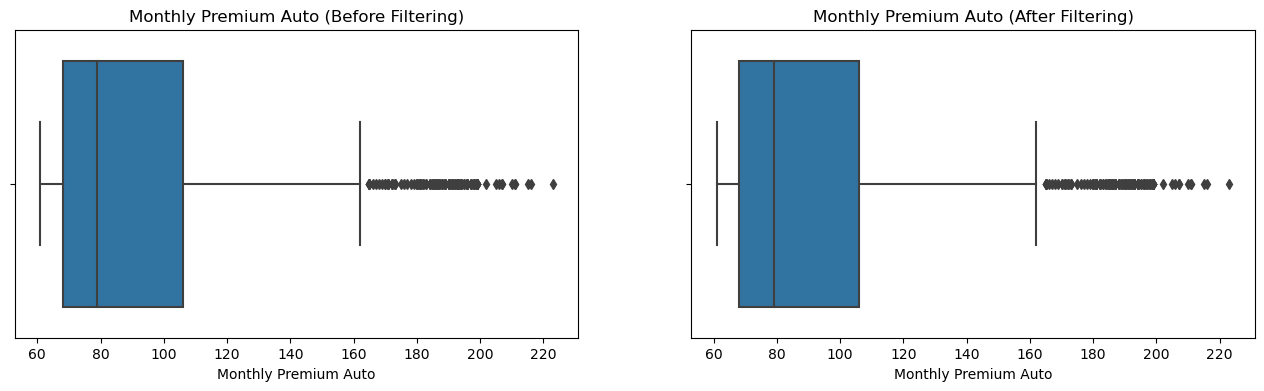

In [109]:
# Menampilkan boxplot 'Monthly Premium Auto' sebelum dan sesudah drop outlier
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Monthly Premium Auto').set(title='Monthly Premium Auto (Before Filtering)')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Monthly Premium Auto').set(title='Monthly Premium Auto (After Filtering)');

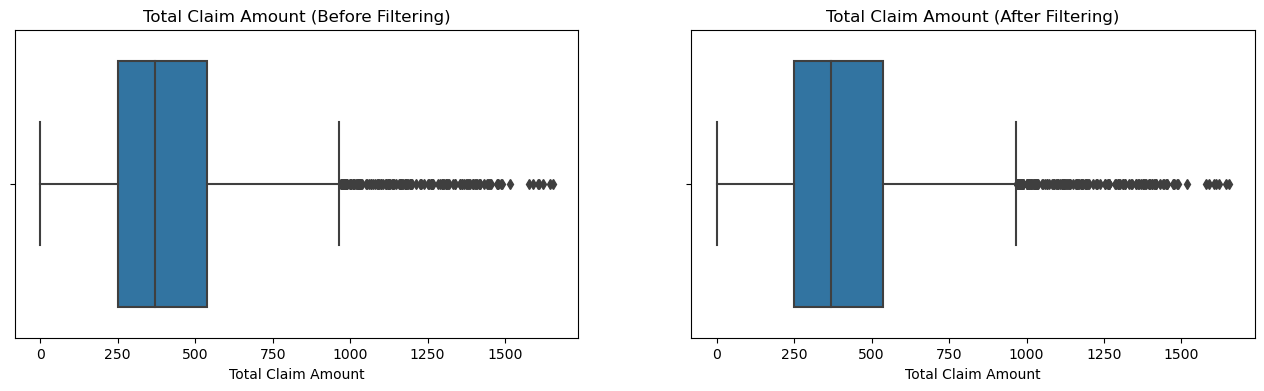

In [110]:
# Menampilkan boxplot 'Total Claim Amount' sebelum dan sesudah drop outlier
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Total Claim Amount').set(title='Total Claim Amount (Before Filtering)')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Total Claim Amount').set(title='Total Claim Amount (After Filtering)');

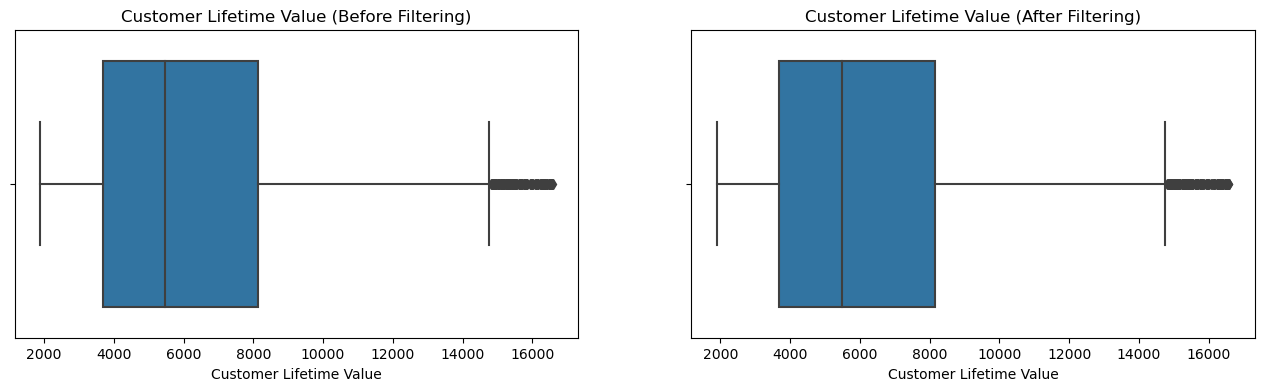

In [111]:
# Menampilkan boxplot 'Customer Lifetime Value' sebelum dan sesudah drop outlier
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Customer Lifetime Value').set(title='Customer Lifetime Value (Before Filtering)')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value').set(title='Customer Lifetime Value (After Filtering)');

In [112]:
# rechecking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4573 non-null   object 
 1   Coverage                 4573 non-null   object 
 2   Renew Offer Type         4573 non-null   object 
 3   EmploymentStatus         4573 non-null   object 
 4   Marital Status           4573 non-null   object 
 5   Education                4573 non-null   object 
 6   Number of Policies       4573 non-null   float64
 7   Monthly Premium Auto     4573 non-null   float64
 8   Total Claim Amount       4573 non-null   float64
 9   Income                   4573 non-null   float64
 10  Customer Lifetime Value  4573 non-null   float64
dtypes: float64(5), object(6)
memory usage: 428.7+ KB


Pada akhirnya, tersisa 4573 baris data yang akan digunakan untuk pemodelan. Ini berarti sekitar 19.3% data sudah tereliminasi (dari drop duplicate dan drop outlier) sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

## **Exploratory Data Analysis**

### Distribution of Customer Lifetime Value 

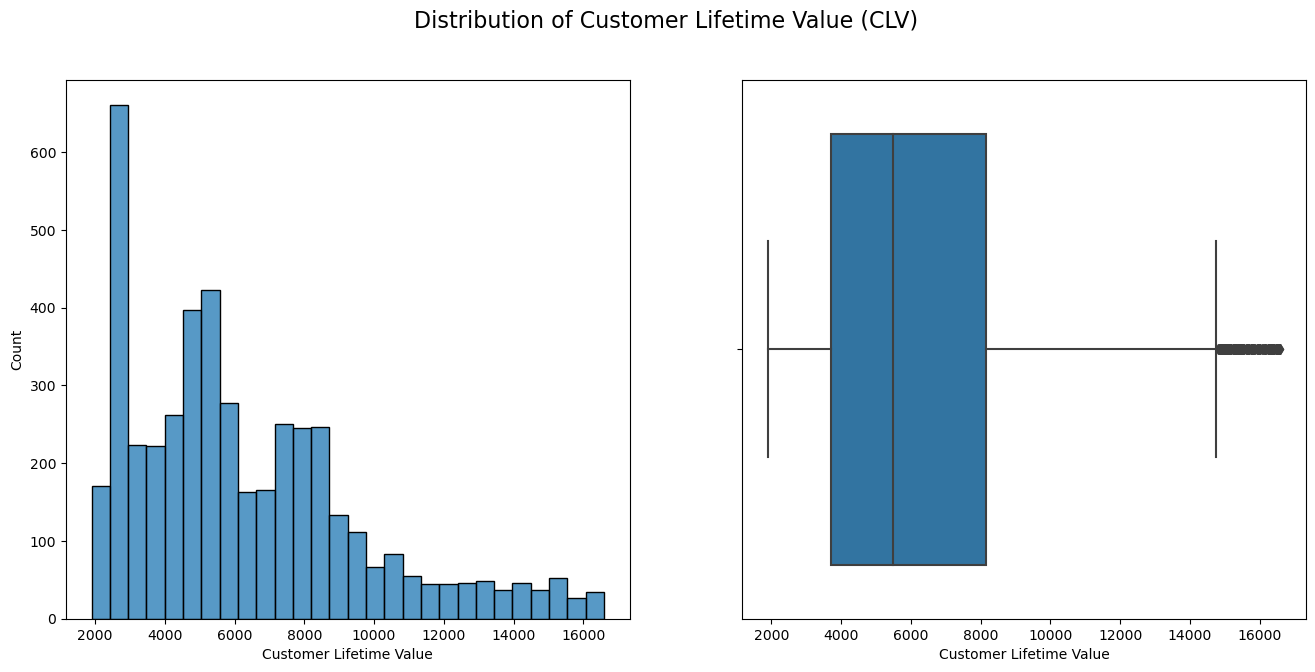

In [113]:
# Customer Lifetime Value distribution & box plot
plt.figure(figsize=(16, 7)).suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value');

Based on the 'Customer Lifetime Value' distribution plot above, it can be seen that the data is a 'right-skewed distribution' which suggests that there are many customers with 'low CLV' and very few customers with 'high CLV'. And the boxplot shows that there are customers with extreme (outlier) 'Customer Lifetime Value' values greater than ±14500.


### Distribution of Numerical Feature

In [114]:
# numerical feature
feat_num = df.describe(include='float64').columns[:-1]
feat_num

Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income'],
      dtype='object')

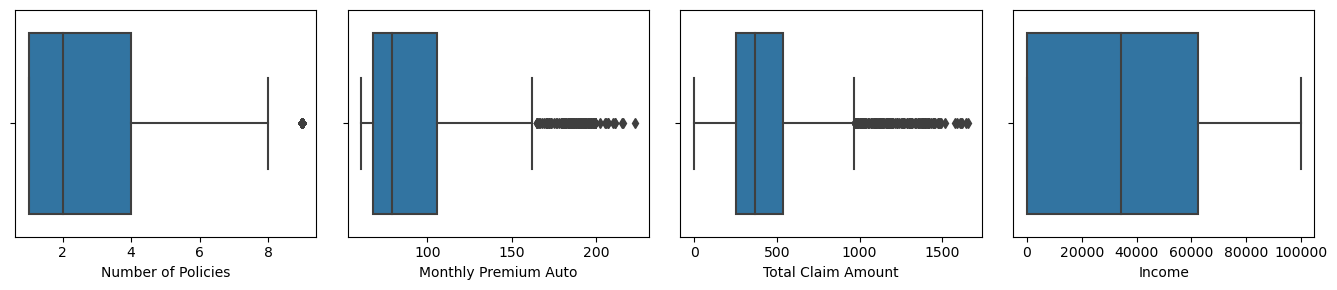

In [115]:
plt.figure(figsize=(20,3))

for col in range(len(feat_num)):

    plt.subplot(1,6, col+1)
    sns.boxplot(data=df, x=feat_num[col])

plt.tight_layout()

Looking at the feature numerical distribution, it is known that these features are not normally distributed (skewed) and there are outliers in the `Number of Policies`, `Monthly Premium Auto` and `Total Claim Amount` features which will be handled in the Data Preprocessing section. However, because I want to see the correlation of numerical features with targets, visualization with scatterplots and heatmaps is required.

### Correlation of Numerical Feature vs Target

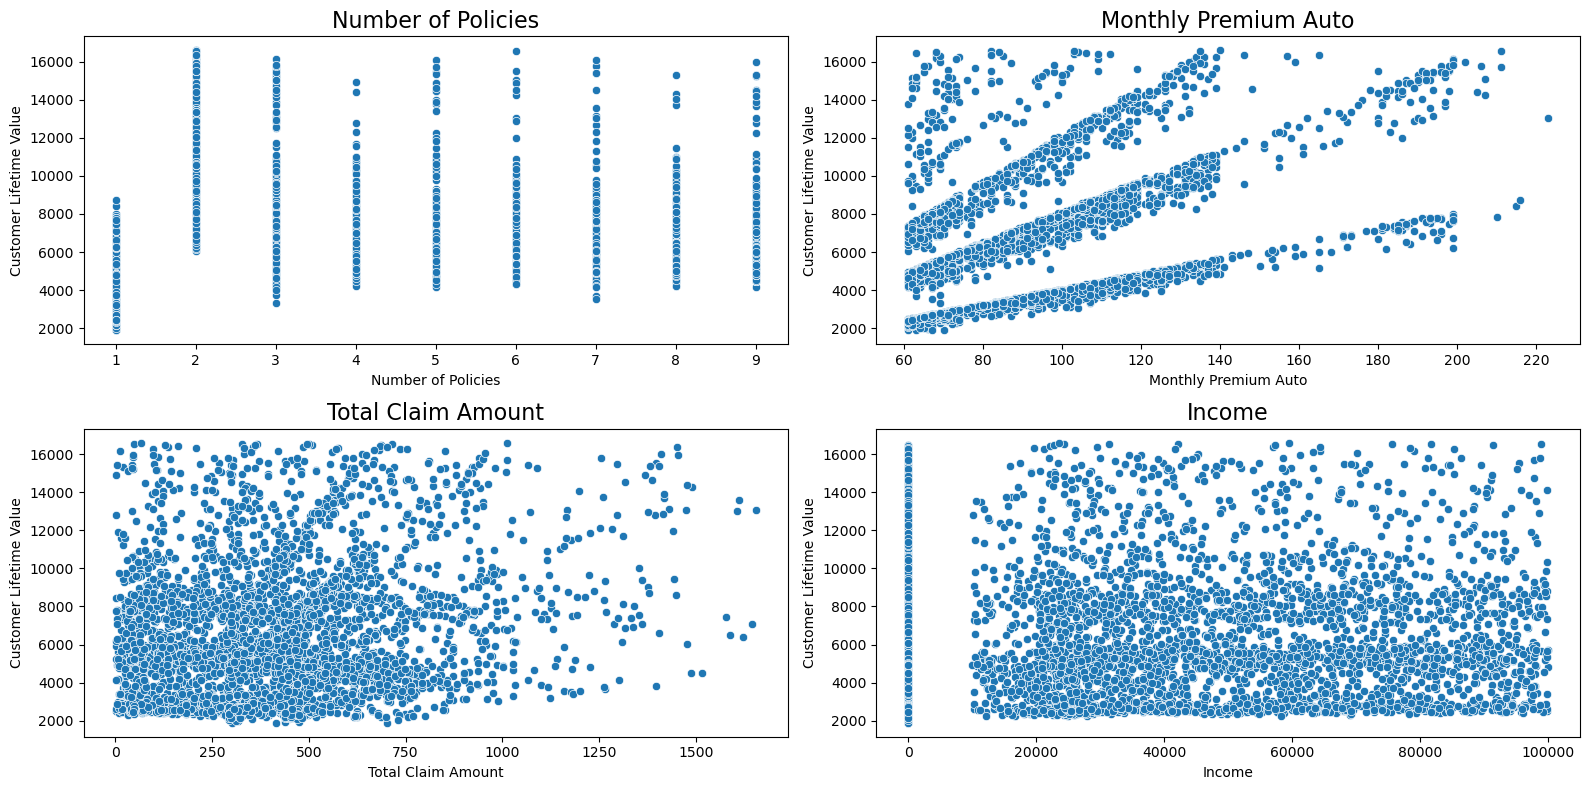

In [151]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in feat_num:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

**The scatterplot analysis reveals the following insights:**

- Customers with exactly two policies are more valuable than customers with a varied number of rules, according to the "Number of Policies" feature. Customers who have more than two policies are called "high-value" customers.
- There is a scattered pattern in the "Monthly Premium Auto" feature indicating that consumers who pay higher monthly vehicle insurance premiums tend to have higher value.
- According to the "Total Claim Amount" feature, claims with sums less than $1,000 are more likely among "low CLV" consumers. However, there is no clear pattern showing whether claims over $1,000 are submitted by "low CLV" or "high CLV" customers.
- Finally, the "Income" function demonstrates that there are users with no stated income who nonetheless have a wide range of CLV, some exceeding $60,000. Aside from that, the "Income" data shows no notable changes in pattern.

**To summarize:**

- Customers that have two insurance are extremely valuable.
- Monthly auto insurance premiums that are higher reflect a better client value.
- Claims of less than $1,000 are more common among low-value consumers.
- Income does not show a major trend, with some clients with high CLV while not having reported income.


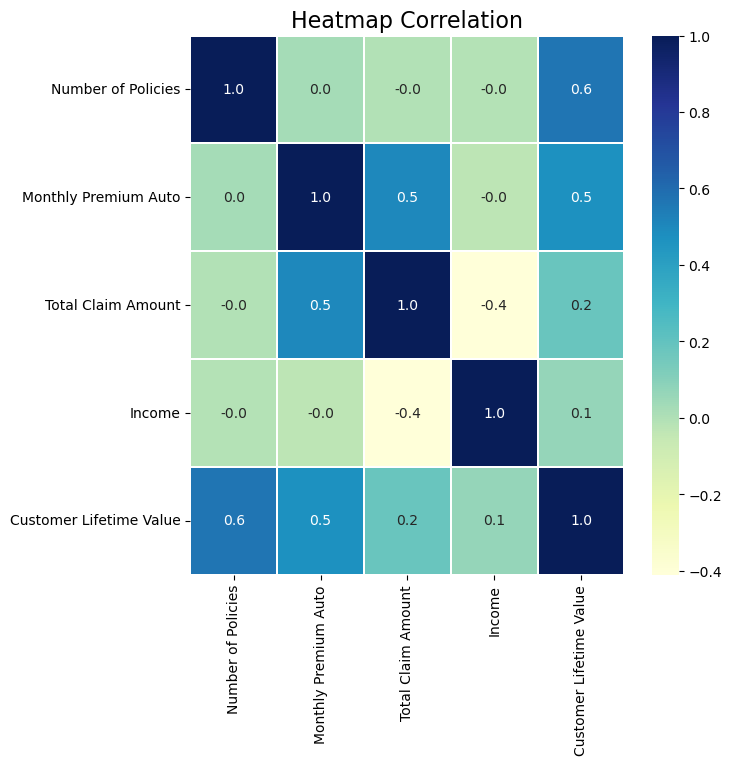

In [117]:
# Displays the correlation value between feature numerical vs target

plt.figure(figsize=(7,7))
sns.heatmap(df.corr('spearman'), annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.05)
plt.title('Heatmap Correlation', size=16);

The heatmap shows that `Customer Lifetime Value` has the largest positive association (0.6) with the `Number of Policies` feature. The `Income` attribute, on the other hand, has the poorest link with `Customer Lifetime Value` (0.1). Furthermore, there is a significant strong connection (0.5) between the `Monthly Premium Auto` and `Total Claim Amount` attributes, demonstrating a link between higher monthly premiums and greater claim amounts.


### Distribution of Categorical Feature

In [118]:
# categorical feature
feat_cat = df.describe(include='object').columns
feat_cat

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education'],
      dtype='object')

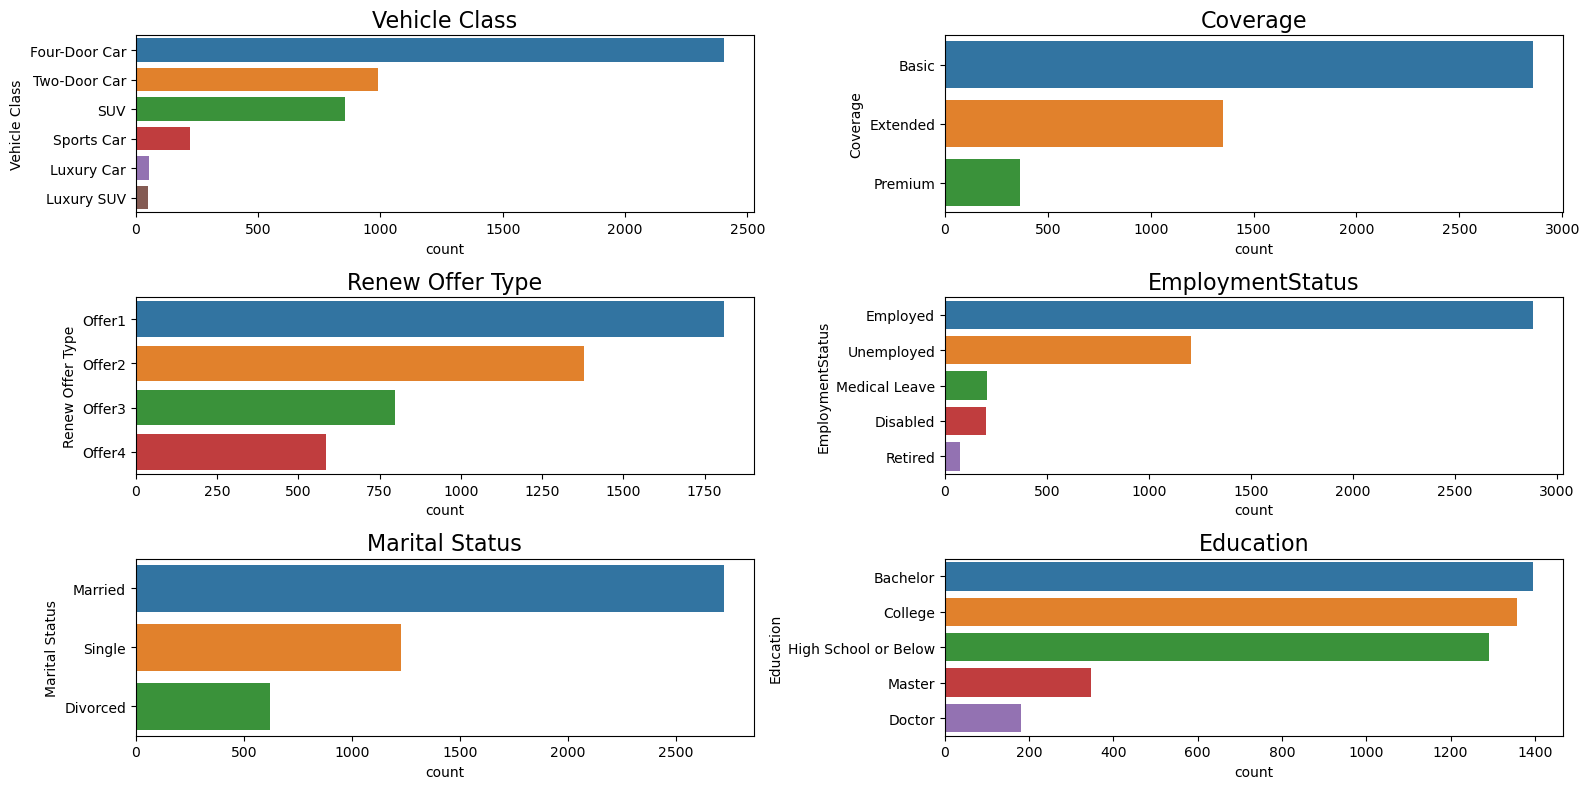

In [119]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in feat_cat:
    plt.subplot(3,2,num_subplot)
    sns.countplot(data=df, y=i,order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

**The following observations can be made when evaluating the categorical features:**

- The majority of clients insure their cars as Four-Door Cars.
- For their automobile insurance, the majority of consumers choose the Basic coverage option.
- When it comes to renewing their insurance, the majority of clients choose Offer 1 over the other options.
- Customers that insure their vehicles are mostly working, married, and have a Bachelor's degree.


### Distribution of Categorical Feature vs Target

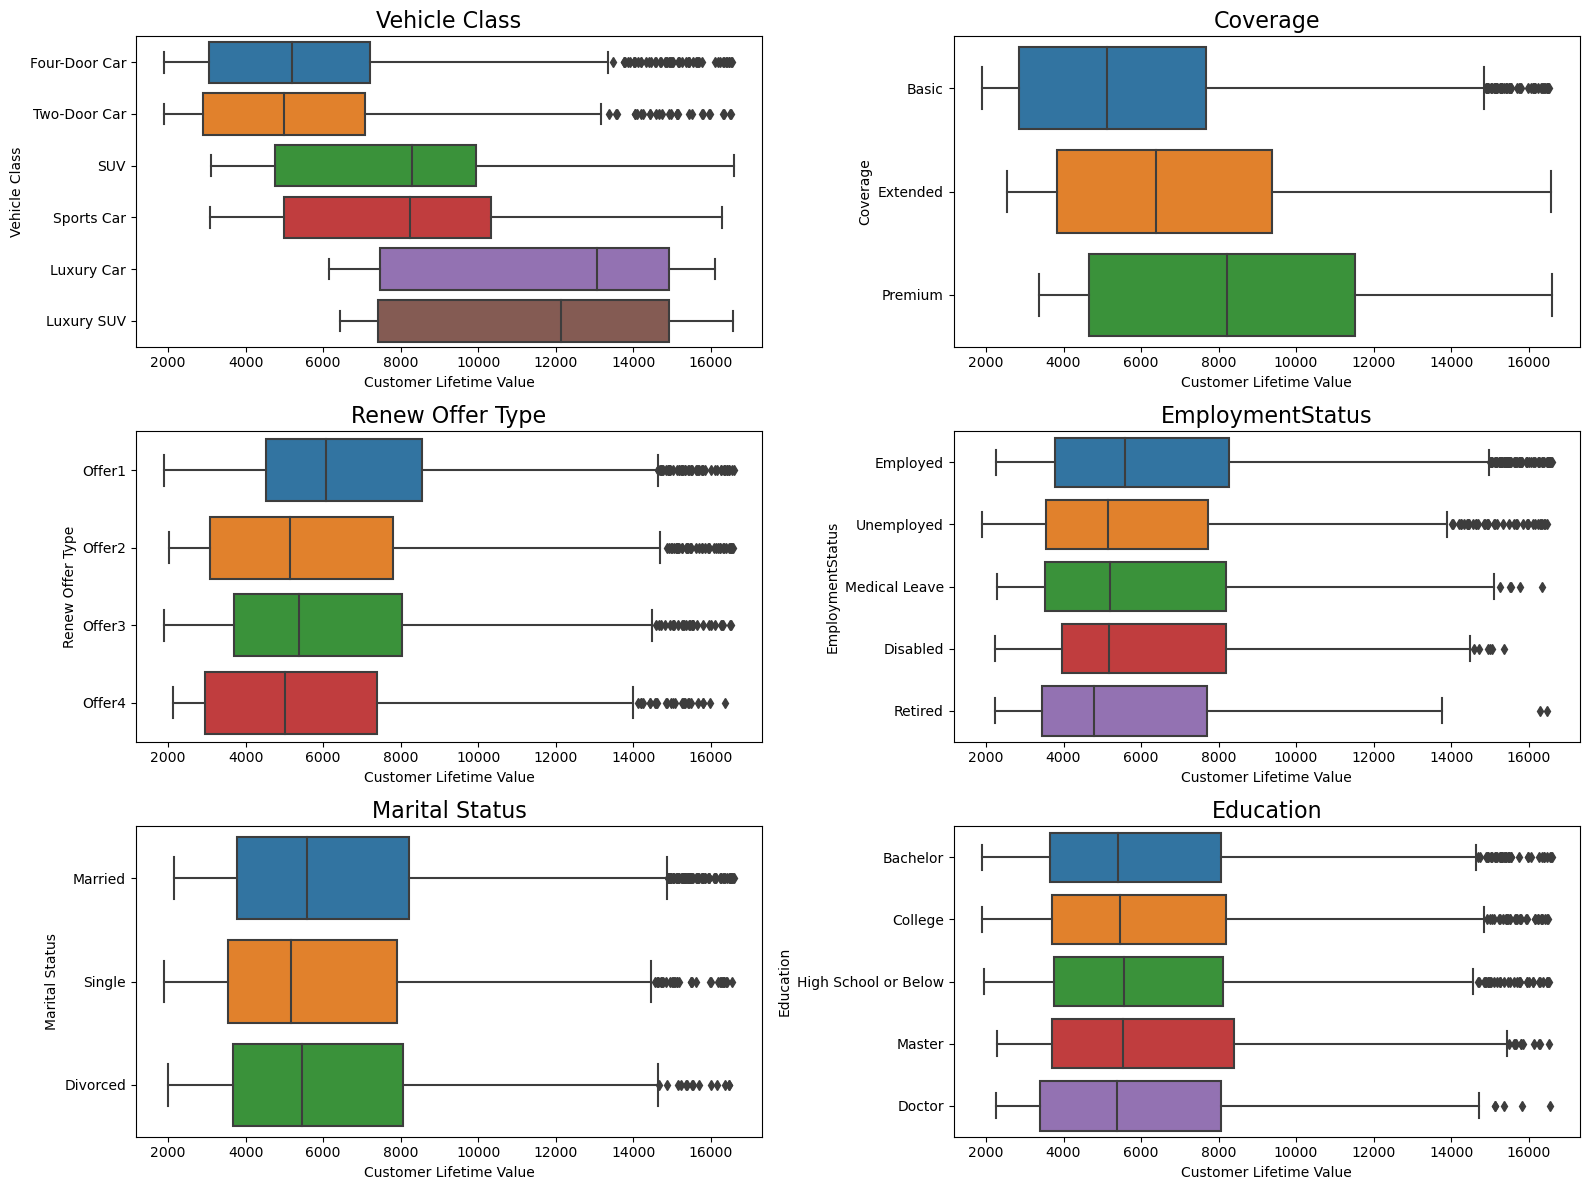

In [120]:
plt.figure(figsize=(16,12))
num_subplot = 1

for i in feat_cat:
    plt.subplot(3,2,num_subplot)
    sns.boxplot(data=df,x='Customer Lifetime Value', y=i,  order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

The following insights can be gained from evaluating the distribution of categorical features in respect to the target variable:

- Customers who own luxury vehicles (Luxury SUV / Luxury Car) have a greater CLV than customers who own other vehicle categories.
- Customers who have "Premium" coverage have greater CLV levels than those who do not.
- Customers who take Offer 1 are more likely to have a high CLV than those who accept other offer kinds.
- Customers with a high CLV are likewise more likely to be employed or married.


## **Define X y**

In [121]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

## **Data Splitting**

In [122]:
# Splitting data with 80:20 proportion
X_train, X_test, y_train, y_test =  train_test_split(
    X,
    y,
    random_state=0,
    test_size=0.2
)

## **Preprocessing**

### **Encode**:

In machine learning, encoding is a method for representing categorical variables as numerical values. I utilize onehot encoding and ordinal encoding for this project. I use this onehot encoding for nominal category features because they contain few unique values and no level above each value. In terms of ordinal encoding, I utilize it on ordinal categorical features with levels of values. The division of the encoder utilized is as follows:

- **Onehot** : `Vehicle Class`, `Renew Offer Type`, `EmploymentStatus`, `Marital Status`
- **Ordinal** : `Education`, `Coverage`

### **Scaler**:

Because the data used has varied values, scaling is required to adjust the features' scales. I'll use RobustScaler as the initial scaler for the cross validation step because it's 'less sensitive' to outliers. The optimal scaler will be selected in the next Hyperparameter Tuning.

- **Robust**: `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income`, `Customer Lifetime Value`

In [123]:
# Ordinal mapping
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5}}
]

# Incorporating encoder in ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping), ['Coverage', 'Education'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Coverage', 'Education'],
                                                mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                 ['Coverage', 'Education'])])

In [124]:
# define scaler
robust = RobustScaler()

## **Modeling (Cross Validation)**

In the beginning, we will model utilizing seven different benchmark models. The outcomes of these benchmark models will be rated using the assessment metrics of choice: RMSE, MAE, and MAPE. These three criteria were chosen to compare the performance of the models by studying their residuals.

The following are the RMSE, MAE, and MAPE formulas:

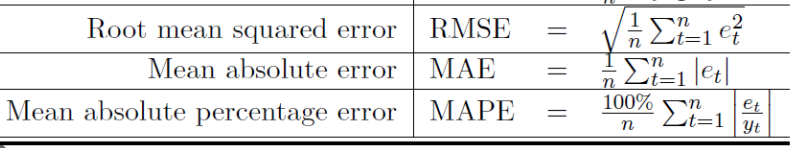

Essentially, RMSE is very sensitive to outliers since the squared term lends more weight to larger residuals. As a result, RMSE produces higher results than MAE. RMSE, on the other hand, is beneficial for evaluating models because it penalizes larger residuals more severely than MAE. One disadvantage of RMSE is that it is difficult to read; thus, I also use MAE to evaluate models because it shows the mean absolute error and is easier to interpret. Furthermore, I use MAPE to provide a percentage representation of the model's mistake, which makes it easier for others to understand.



In [125]:
# Define algoritma 
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
xgboost = XGBRegressor(random_state= 0)
gboost = GradientBoostingRegressor(random_state= 0)
bagging = BaggingRegressor(random_state=0, estimator=KNeighborsRegressor(n_neighbors=3))
stacking = StackingRegressor(
    estimators=[
    ('clf1', linreg),
    ('clf2', knn),
    ('clf3', tree),
        ],
    
)
voting = VotingRegressor([
    ('clf1', linreg),
    ('clf2', knn),
    ('clf3', tree),
]) 

model = [linreg, knn, tree, rf, ada, xgboost, gboost, bagging, stacking, voting]

In [126]:
# algorithm list
list_algo = [linreg, knn, tree, rf, ada, xgboost, gboost, bagging, stacking, voting]
# scoring list
list_scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']

# empty lists
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []


# looping
for algo in list_algo:

    # pipeline that combines preprocessing and modeling
    # (to avoid information leakage)
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_validate( 
        estimator= pipe_model,  # model
        X = X_train,            # X_train
        y = y_train,            # y_train
        cv = 5,                 # fold
        scoring= list_scoring   # metric
    ) 

    # RMSE Score
    score_RMSE.append(cv_score['test_neg_root_mean_squared_error'])
    list_mean_RMSE.append(cv_score['test_neg_root_mean_squared_error'].mean())
    list_std_RMSE.append(cv_score['test_neg_root_mean_squared_error'].std())

    # MAE Score
    score_MAE.append(cv_score['test_neg_mean_absolute_error'])
    list_mean_MAE.append(cv_score['test_neg_mean_absolute_error'].mean())
    list_std_MAE.append(cv_score['test_neg_mean_absolute_error'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_neg_mean_absolute_percentage_error'])
    list_mean_MAPE.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
    list_std_MAPE.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

In [127]:
cvresult_before_tuning = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost','Bagging','Stacking','Voting'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

cvresult_before_tuning

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-2790.031,122.869,-2088.252,86.081,-0.382,0.012
1,KNN,-2746.577,110.994,-1874.433,60.404,-0.343,0.008
2,Decision Tree,-1281.562,70.903,-457.508,28.947,-0.057,0.003
3,Random Forest,-960.800,52.040,-378.161,21.665,-0.045,0.002
4,AdaBoost,-1413.055,30.055,-1018.336,35.366,-0.152,0.005
5,XGBoost,-1018.389,68.573,-453.805,24.808,-0.067,0.003
6,Gradient Boost,-920.469,66.414,-396.396,9.365,-0.051,0.003
7,Bagging,-2800.943,110.071,-1870.477,44.492,-0.342,0.008
8,Stacking,-1229.627,62.831,-535.358,37.566,-0.075,0.004
9,Voting,-1896.745,98.993,-1271.654,64.334,-0.232,0.005


In [128]:
cvresult_before_tuning_mean = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost','Bagging','Stacking','Voting'],
    'mean_RMSE': list_mean_RMSE,
    'mean_MAE': list_mean_MAE,
    'mean_MAPE': list_mean_MAPE,
}).round(3)

cvresult_before_tuning_mean

,model,mean_RMSE,mean_MAE,mean_MAPE
0,Linear Regression,-2790.031,-2088.252,-0.382
1,KNN,-2746.577,-1874.433,-0.343
2,Decision Tree,-1281.562,-457.508,-0.057
3,Random Forest,-960.800,-378.161,-0.045
4,AdaBoost,-1413.055,-1018.336,-0.152
5,XGBoost,-1018.389,-453.805,-0.067
6,Gradient Boost,-920.469,-396.396,-0.051
7,Bagging,-2800.943,-1870.477,-0.342
8,Stacking,-1229.627,-535.358,-0.075
9,Voting,-1896.745,-1271.654,-0.232


According to the cross validation, there are differences in the results between the RMSE and MAE values, with the RMSE values being higher because the residual values are squared before being averaged, whereas the MAE residual values are absolute and thus smaller. The RMSE score is also larger because RMSE gives more weight to large residual values (which are more sensitive to residual outliers). In other words, because all of the algorithms used create huge error numbers, there is a significant discrepancy between the RMSE and MAE values.

- Based on the RMSE value, Gradient Boost is the best model. Meanwhile, based on MAE and MAPE values, RandomForest has the lowest score.
- Next, predictions will be made on the test set with the 2 best benchmark models, namely Gradient Boost and RandomForest.

### Predict to Test Set (with Benchmark Model)

Predictions on the test set using Random Forest and Gradient Boost.

In [129]:
# best 2 benchmark algorithm
test_models = [rf, gboost]

rmse_score =[]
mae_score =[]
mape_score =[]

# predict to testset
for i in test_models:
    pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', robust),
        ('algo', i)
    ])

    # Fitting & predict
    pipe_model.fit(X_train, y_train)
    y_pred = pipe_model.predict(X_test)

    # Calculate RMSE, MAE, and MAPE and combine them in the list    
    rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_score.append(mean_absolute_error(y_test, y_pred))
    mape_score.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({
    'RMSE': rmse_score,
    'MAE': mae_score,
    'MAPE': mape_score},
    index=['rf', 'gboost']).round(3)

score_before_tuning

,RMSE,MAE,MAPE
rf,974.125,378.215,0.045
gboost,889.688,360.287,0.046


The Gradient Boost prediction outperforms the Random Forest prediction after predicting the test set since the Random Forest's RMSE, MAE, and MAPE increase after being forecasted to the test set. Meanwhile, Gradient Boost's RMSE, MAE, and MAPE reduced, indicating better predictions.

## **Hyperparameter Tuning**

Because the Gradient Boost model outperforms the RandomForest model, I will utilize this Gradient Boost model as the final model. At this point, we will tune the Gradient Boost model's hyperparameters in the hopes of enhancing the model's performance.

Gradient Boosting is a supervised learning ensemble approach based on decision trees. It works in regression issues by first producing a forecast based on the target variable's average. It then computes the initial residuals and constructs decision trees to predict them. To avoid overfitting, the model mixes the initial prediction with the scaled anticipated residuals. This iterative process is repeated until a maximum limit is reached or the residuals no longer decline significantly. With modest residuals, the final predictions approximate the observed data.

For hyperparameter tuning, refer to the scikit-learn documentation on [Tuning Gradient Boost.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
.

**RandomizedSearchCV**

In [130]:
# define other scalers for tuning to find the best scaler
standard = StandardScaler()
minmax = MinMaxScaler()

# merge into 1 list scaler
scaler = [robust, standard, minmax]

In [131]:
# Tree max depth
max_depth = list(np.arange(3, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Number of trees
n_estimators = list(np.arange(100, 201, 2))

# Number of rows per tree (% of total train set rows)
subsample = list(np.arange(2, 10)/10)

# number of features used for splitting in tree (% of total number of train set columns)
max_features = list(np.arange(1,10)/10)
max_features.append(None)

# Alpha (regularization)
alpha = list(np.arange(0.1, 1.0, 0.1)) # The larger the value, the more conservative/simpler the model is

# for param_grid
hyperparam = {
    'model__max_depth': max_depth,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features,    
    'model__alpha': alpha,
    'scaler': scaler
}


In [132]:

# for estimator
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('scaler',scaler),
        ('model', gboost)
    ])


# define randomsearch
randomsearch = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam,
    n_iter= 4000, 
    cv = 5,
    scoring=list_scoring,
    n_jobs= -1,
    refit= 'neg_root_mean_squared_error',
    random_state=0
)

In [133]:
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['Coverage',
                                                                                                    'Education'],
                                                                                              mapping=[{'col': 'Coverage',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapp...
                                                                118, 120, 122,
                                                                124, 126, 128,
                                                                130, 132, 134,
                                                                136, 138, 140,
                                                                142, 144, 146,
                                                                148, 150, 152,
                                                                154, 156, 158, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9],
                                        'scaler': [RobustScaler(),
                                                   StandardScaler(),
                                                   MinMaxScaler()]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error'])

In [134]:
# View tuning results in the form of a dataframe. Sorted by RMSE, MAE & MAPE
pd.DataFrame(randomsearch.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
384,0.695876,0.015408,0.020877,0.000837,RobustScaler(),0.5,162,0.7,4,0.04,...,58.292684,1,-0.050261,-0.047070,-0.049083,-0.046947,-0.048297,-0.048332,0.001249,43
3263,1.268869,0.017978,0.033036,0.001105,RobustScaler(),0.6,168,0.8,4,0.03,...,63.949188,2,-0.047753,-0.045299,-0.048212,-0.045441,-0.044578,-0.046256,0.001446,20
865,0.879238,0.037777,0.019832,0.001386,MinMaxScaler(),0.8,196,0.7,3,0.05,...,69.000696,3,-0.050638,-0.046665,-0.053430,-0.049569,-0.051946,-0.050450,0.002291,72
672,0.680458,0.021720,0.021371,0.000852,RobustScaler(),0.6,138,0.6,5,0.04,...,52.942231,4,-0.048990,-0.045610,-0.049707,-0.044795,-0.045131,-0.046847,0.002072,28
1030,0.720382,0.006741,0.020294,0.001352,MinMaxScaler(),0.9,190,0.5,3,0.05,...,67.577583,5,-0.050537,-0.047076,-0.051331,-0.049636,-0.049882,-0.049693,0.001434,64


In [135]:
print('Gradient Boost (by RandomizedSearchCV)')
print('Best_score:', randomsearch.best_score_)
print('Best_params:', randomsearch.best_params_)

Gradient Boost (by RandomizedSearchCV)
Best_score: -915.4015228057272
Best_params: {'scaler': RobustScaler(), 'model__subsample': 0.5, 'model__n_estimators': 162, 'model__max_features': 0.7, 'model__max_depth': 4, 'model__learning_rate': 0.04, 'model__alpha': 0.4}


After performing hyperparameter tuning using RandomizedSearch, it was found that the performance of the Gradient Boost model slightly improved with the following details:

Before Tuning = 920.469

After Tuning (RandomizedSearch) = 915.402 

Best parameter Randomized Search: 
- scaler: RobustScaler()
- subsample: 0.5
- n_estimators: 162
- max_features: 0.7
- max_depth: 4
- learning_rate: 0.04
- alpha: 0.4

Then next time I tried tuning using GridSearch by narrowing the values in the hyperparam_space in the hope that the model performance would be better than before.

**GridSearchCV**

GridSearch is done specifically for the Gradient Boost parameter only, the scaler is not re-tuned because it has gotten the best scaler through RandomizedSearch.

In [136]:
# Tree max depth
max_depth = [3, 4, 7]

# Learning rate
learning_rate = [0.1,0.025, 0.04, 0.01]

# Number of trees
n_estimators = [ 200, 400, 500]

# Number of rows per tree (% of total train set rows)
subsample = [0.4 ,0.5, 0.6, 0.8]

# number of features used for splitting in tree (% of total number of train set columns)
max_features = [0.5, 0.6 , 0.7, None]

# Alpha (regularization)
alpha = [0.4, 0.5, 0.6] # The larger the value, the more conservative/simpler the model is


In [137]:
# for param_grid
hyperparam = {
    'model__max_depth': max_depth,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features,    
    'model__alpha': alpha
}


# untuk estimator
pipe_model_grid = Pipeline([
        ('preprocessing', transformer),
        ('scaler',robust),
        ('model', gboost)
    ])

# define gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model_grid,
    param_grid= hyperparam,
    cv = 5,
    scoring=list_scoring,
    n_jobs= -1,
    refit= 'neg_root_mean_squared_error'
)

In [138]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Coverage',
                                                                                              'Education'],
                                                                                        mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': B...
             param_grid={'model__alpha': [0.4, 0.5, 0.6],
                         'model__learning_rate': [0.1, 0.025, 0.04, 0.01],
                         'model__max_depth': [3, 4, 7],
                         'model__max_features': [0.5, 0.6, 0.7, None],
                         'model__n_estimators': [200, 400, 500],
                         'model__subsample': [0.4, 0.5, 0.6, 0.8]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_root_mean_squared_error',
                      'neg_mean_absolute_percentage_error'])

In [139]:
pd.DataFrame(gridsearch.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__learning_rate,param_model__max_depth,param_model__max_features,param_model__n_estimators,param_model__subsample,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
524,2.096542,0.035108,0.032951,0.000653,0.4,0.01,4,None,500,0.4,...,57.532093,1,-0.047343,-0.045004,-0.047822,-0.045783,-0.044546,-0.046100,0.001283,136
1100,2.253080,0.031522,0.034955,0.001505,0.5,0.01,4,None,500,0.4,...,57.532093,1,-0.047343,-0.045004,-0.047822,-0.045783,-0.044546,-0.046100,0.001283,136
1676,2.202561,0.006169,0.035084,0.002790,0.6,0.01,4,None,500,0.4,...,57.532093,1,-0.047343,-0.045004,-0.047822,-0.045783,-0.044546,-0.046100,0.001283,136
216,0.767450,0.034371,0.022679,0.001070,0.4,0.025,4,0.7,200,0.4,...,62.904463,4,-0.049182,-0.045754,-0.048623,-0.046214,-0.045250,-0.047005,0.001589,190
792,0.773065,0.030284,0.023161,0.001080,0.5,0.025,4,0.7,200,0.4,...,62.904463,4,-0.049182,-0.045754,-0.048623,-0.046214,-0.045250,-0.047005,0.001589,190


In [140]:
print('Gradient Boost (by GridSearchCV)')
print('Best_score:', gridsearch.best_score_)
print('Best_params:', gridsearch.best_params_)

Gradient Boost (by GridSearchCV)
Best_score: -913.6861508396381
Best_params: {'model__alpha': 0.4, 'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__max_features': None, 'model__n_estimators': 500, 'model__subsample': 0.4}


After performing hyperparameter tuning using GridSearch, it was found that the performance of the Gradient Boost model slightly improved with the following details:

Before Tuning = 920.469

After Tuning (RandomizedSearch) = 915.402 

After Tuning (GridSearch) = 913.686

Best parameter Grid Search: 
- scaler: RobustScaler()
- subsample: 0.4
- n_estimators: 500
- max_features: none
- max_depth: 4
- learning_rate: 0.01
- alpha: 0.4

With parameters that are relatively similar to the RandomizedSearch results, it turns out that tuning using GridSearch results in better model performance.

### Predict to Test Set (with Hyperparameter Tuning Model)

Make predictions on the test set using the Gradient Boost model and selected hyperparameters from RandomizedSearch and GridSearch.

In [141]:
# Define model with best estimator (via RandomizedSearch)
gboost_tuning_random = randomsearch.best_estimator_

# Fitting model
gboost_tuning_random.fit(X_train, y_train)

# Predict test set
y_pred_gboost_tuning_random = gboost_tuning_random.predict(X_test)

# Save RMSE, MAE & MAPE metrics values ​​after tuning_random
rmse_gboost_tuning_random = np.sqrt(mean_squared_error(y_test, y_pred_gboost_tuning_random))
mae_gboost_tuning_random = mean_absolute_error(y_test, y_pred_gboost_tuning_random)
mape_gboost_tuning_random = mean_absolute_percentage_error(y_test, y_pred_gboost_tuning_random)

score_after_tuning_random = pd.DataFrame({'RMSE': rmse_gboost_tuning_random, 'MAE': mae_gboost_tuning_random, 'MAPE': mape_gboost_tuning_random}, index= ['gboost']).round(3)
score_after_tuning_random

,RMSE,MAE,MAPE
gboost,899.653,360.726,0.045


In [142]:
# Define model with best estimator (via GridSearch)
gboost_tuning = gridsearch.best_estimator_

# Fitting model
gboost_tuning.fit(X_train, y_train)

# Predict test set
y_pred_gboost_tuning = gboost_tuning.predict(X_test)

# Save RMSE, MAE & MAPE metrics values ​​after tuning_random
rmse_gboost_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gboost_tuning))
mae_gboost_tuning = mean_absolute_error(y_test, y_pred_gboost_tuning)
mape_gboost_tuning = mean_absolute_percentage_error(y_test, y_pred_gboost_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_gboost_tuning, 'MAE': mae_gboost_tuning, 'MAPE': mape_gboost_tuning}, index= ['gboost']).round(3)
score_after_tuning

,RMSE,MAE,MAPE
gboost,905.781,358.51,0.045


**Performance Comparison**

Comparison of the performance of the Gradient Boost model before and after hyperparameter tuning.

In [143]:
# Model performance before tuning
score_before_tuning.loc[['gboost']]

,RMSE,MAE,MAPE
gboost,889.688,360.287,0.046


In [144]:
# Model performance after tuning(RandomizedSearch)
score_after_tuning_random

,RMSE,MAE,MAPE
gboost,899.653,360.726,0.045


In [145]:
# Model performance after tuning(GridSearch)
score_after_tuning

,RMSE,MAE,MAPE
gboost,905.781,358.51,0.045


The RMSE has increased because the data we use has the required outliers,
but the MAE and MAPE has decreased. so the model has a slight performance boost

## **Residual Plot (Evaluation)**

The residual plot can be used to evaluate the prediction results from the Gradient Boost model described above. The residual plot is a scatter plot with expected values on the x-axis and residuals on the y-axis. We can also observe how much our prediction results can be off with this residual plot.

In [146]:
# Create a dataframe containing observational data, predicted results, and residuals
df_result = df[['Customer Lifetime Value']].copy()
df_result['y_pred'] = gboost_tuning.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['y_pred']
df_result

,Customer Lifetime Value,y_pred,residual
0,10083.486880,10377.533250,-294.046370
1,4943.386117,5179.352133,-235.966016
2,11981.984810,9263.990240,2717.994570
3,4550.856045,4436.552946,114.303099
4,2372.155492,2438.722689,-66.567197
...,...,...,...
5663,8114.409136,8822.517829,-708.108693
5664,2442.216651,2637.473698,-195.257047
5665,12904.943360,13062.881105,-157.937745
5666,2447.053134,2563.200399,-116.147265


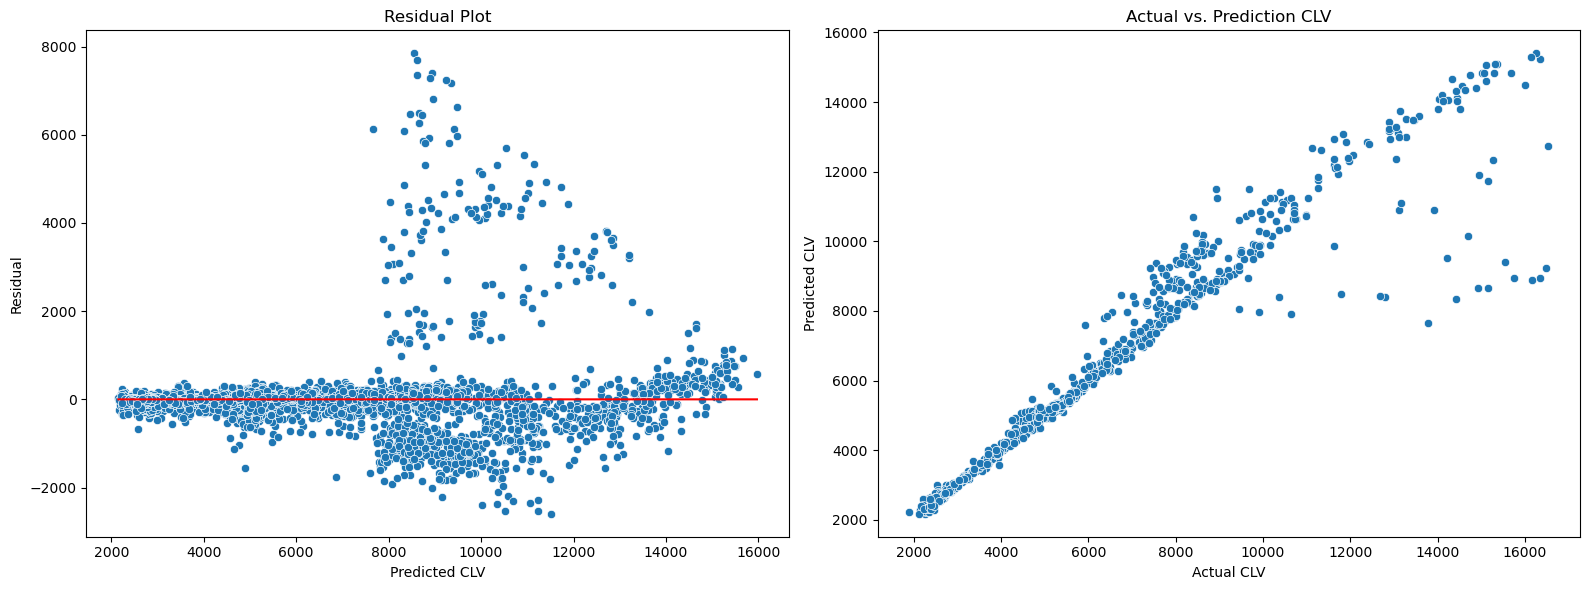

In [147]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='y_pred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='y_pred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_gboost_tuning).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout();

As seen by the several error values near to zero in the residual plot above, this model is quite reliable in forecasting CLV values below 8000. The residual variance is non-uniform for values above 8000, with some overprediction (errors up to 2000) and underprediction (errors up to 7000). The Actual versus Predicted CLV figure similarly shows reasonably accurate predictions, forming a straight line with a few outliers spread within a range of about 9000.

## **Feature Importance**

To be able to find out which features affect target prediction (CLV), we can check it through the feature_importances_ function.

In [148]:
# Fetches feature name from onehot encoder
f_onehot = transformer.named_transformers_['onehot'].get_feature_names_out()

# Get the features name from ordinal encoder
f_ordinal = transformer.transformers[1][1].cols

# Get the passthrough feature name from the ColumnTransformer
f_remain = X_train.iloc[:, transformer.transformers_[2][2]].columns

# Merge feature names
all_feat = list(f_onehot) + list(f_ordinal) + list(f_remain)

# Create a Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : all_feat,
    'imp' : gboost_tuning['model'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
16,Number of Policies,0.643839
17,Monthly Premium Auto,0.321233
19,Income,0.014294
18,Total Claim Amount,0.009469
15,Education,0.001825
5,EmploymentStatus_Employed,0.001804
9,Renew Offer Type_Offer2,0.001341
14,Coverage,0.001232
13,Marital Status_Single,0.000987
12,Marital Status_Married,0.000953


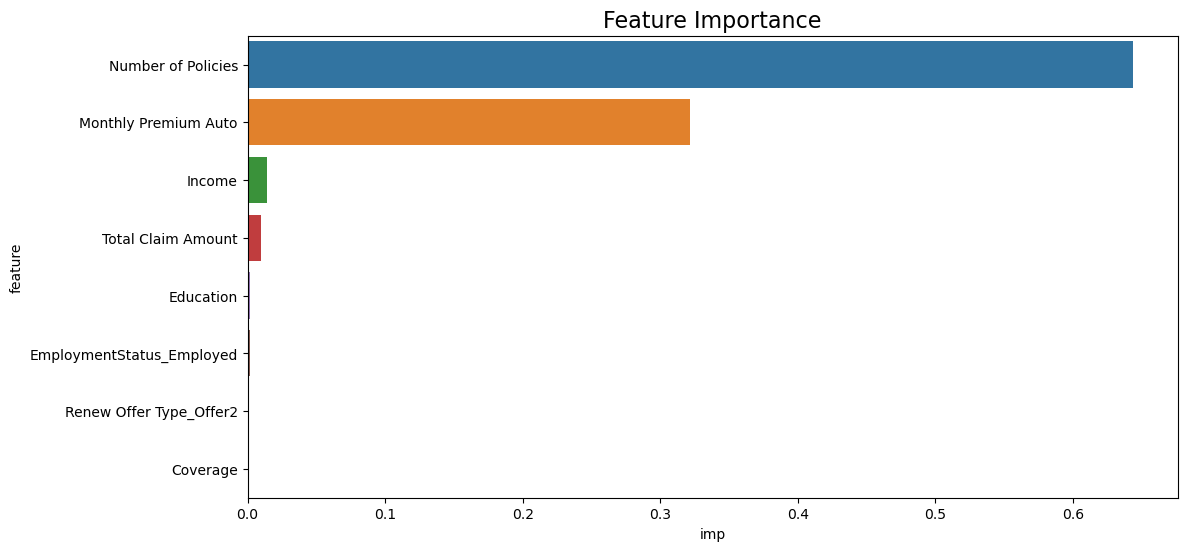

In [149]:
# Bar feature importance
plt.figure(figsize=(12,6))
sns.barplot(data=feature_imp.head(8), x='imp', y='feature')
plt.title('Feature Importance', size=16);

## Conclusion

The features `Number of Policies` and `Monthly Premium Auto` have the largest influence on `Customer Lifetime Value` according to the modeling. This is consistent with the initial assumption that these two characteristics have the largest positive link with `Customer Lifetime Value`.

The model`s evaluation metrics are RMSE, MAE, and MAPE values. If we look at the MAE value (because it is easier to interpret) that is generated after the hyperparameter tuning, which is 373,974, we can conclude that if the model that has been built later estimates the CLV of the car insurance company in the range of values according to the model limitations (maximum CLV value is 16624.75), the estimated CLV value may be 373,974 less than the CLV value that should be. Alternatively, if the MAPE value is used, the predicted CLV value may be 4.8% lower than the actual CLV value.

However, this does not rule out the chance that the forecast would miss even more because the residual plot has a non-uniform variance (calculated at CLV > 8000). This model's bias may be caused by a lack of characteristics and data in the dataset that can better describe the CLV value itself.

**Model Limitation**

This model has limitations in predicting CLV values, and if it is used with data that exceeds the model's restrictions, the results will be less reliable. The model has the following limitations:
- Maximum monthly premium cost (`Monthly Premium Auto`) = $224.42 
- Maximum total claim amount (`Total Claim Amount`) = $1777
- Capable of predicting `Customer Lifetime Value` within a range of 16624.75. Above this threshold, the findings will be skewed.


## Recommedation

**For Modeling Machine Learning**

1. Determine which forecasts have high mistakes (both overpredictions and underpredictions), and then investigate which features produce high errors.
2. If possible, include features linked to CLV predictions such as length of time as a motor insurance customer, insurance coverage classification (e.g., Basic I, Basic II, Basic III, etc.), area of residence, and others.
2. Adding client data to improve machine learning`s prediction of CLV.
3. The model developed can be used to construct other models, such as investigating the use of unsupervised learning (clustering) to segment lucrative and unprofitable clients in order to better define marketing strategies.

**For Business**

1. Given that the `Number of Policies` and `Monthly Premium Auto` are the most relevant features in predicting CLV, it is preferable to be able to make individualized offers to consumers based on the number of policies and premium fees paid. This customised offer will be beneficial since the marketing budget will be more personalized in order to avoid paying more for low-value clients while losing high-value customers.
2. Companies should be able to upsell and cross-sell to customers if they know the CLV forecast findings from machine learning. Upselling and cross-selling will provide a possibility for new policy sales and premium fees paid, thereby increasing customer CLV.


---